<h1> Transformée de Fourier discrète </h1>

<h2> Question 1 à 4 </h2>

Soit ($s_n$) un signal discret périodique de période N. Sa transformation TFD (transformée de Fourier discrète) est un signal discret périodique de même période N, défini par: 

$$S_p = \frac{1}{N} \sum_{n=0}^{N-1} s_n e^{-2i\pi p\frac{n}{N}},\quad p\in\mathbb{Z}$$

Ici, nous avons N=4, ainsi :

$S_0 = 3$ 

$S_1 = 1$

$S_2 = -1$

$S_3 = 1$

Sa tranformée inverse est donnée par :

$$s(n) = \sum_{p=0}^{N-1} S_p e^{2i\pi n\frac{p}{N}},\quad n\in\mathbb{Z}$$

On obtient donc :

$s(0) = 1$

$s(1) = 1$

$s(2) = 0$

$s(3) = 1$

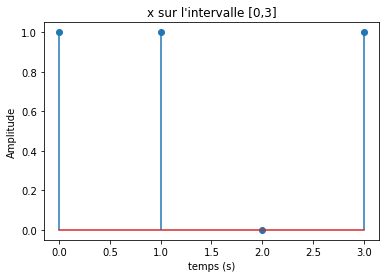

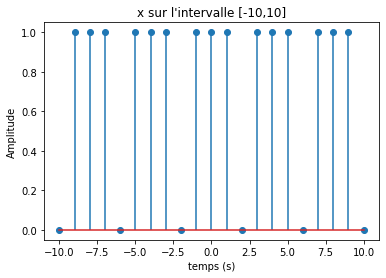

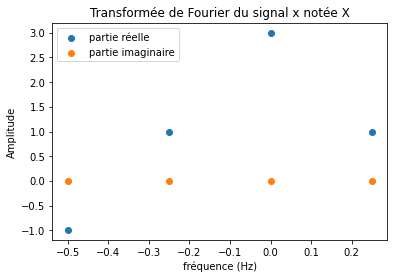

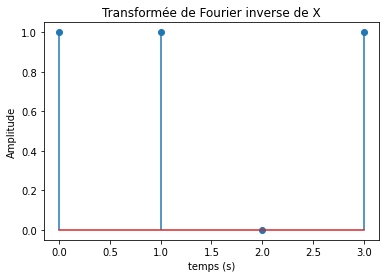

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Valeur de x
L = [0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0]
LL = np.array([1,1,0,1])

# Axe temporel
X = np.arange(-10,11)
Xx = np.arange(0,4)

# Transformation de Fourier
X1 = np.fft.fft(LL)

# Transformation de Fourier inverse
X2 = np.fft.ifft(X1)

# Axe des fréquences
freqs = np.fft.fftfreq(len(Xx))

# affichage des signaux
plt.figure()
plt.stem(Xx, LL)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title("x sur l'intervalle [0,3]")

plt.figure()
plt.stem(X, L)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title("x sur l'intervalle [-10,10]")

plt.figure()
plt.scatter(freqs, np.real(X1), label='partie réelle')
plt.scatter(freqs, np.imag(X1), label='partie imaginaire')
plt.xlabel('fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title("Transformée de Fourier du signal x notée X")
plt.legend()

plt.figure()
plt.stem(Xx, np.abs(X2))
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title("Transformée de Fourier inverse de X")
plt.show()

<p> Pour le schéma "Transformée de Fourier du signal x", on a la relation : $S_{-n} = S_{-n+N}$ avec $N$ la taille de notre échatillon </p>

<p> D'où : $S_{-1} = S_{-1+4} = S_3 = 1$ et $S_{-2} = S_{-2+4} = S_2 = -1$ </p>

<p> On retrouve bien le signal de départ après l'application de la transformée de Fourier puis de la transformée de Fourier inverse </p>

<h2> Question 5 et 6 </h2>

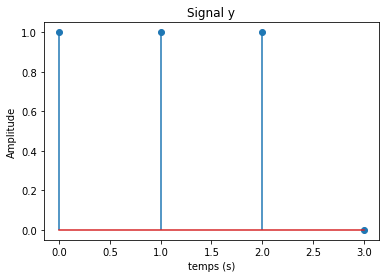

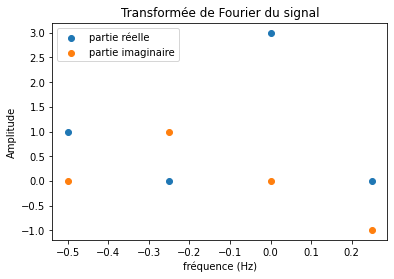

In [8]:
LL = np.array([1,1,0,1])
Xx = np.arange(0,4)

# définiton de y
y=[]
for i in range(len(LL)):
    y.append(LL[i-1])
Y = np.fft.fft(y)
freq = np.fft.fftfreq(len(y))

# affichage des signaux
plt.figure()
plt.stem(Xx, y)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title("Signal y")
plt.figure()
plt.scatter(freq, np.real(Y), label='partie réelle')
plt.scatter(freq, np.imag(Y), label='partie imaginaire')
plt.xlabel('fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title("Transformée de Fourier du signal")
plt.legend()
plt.show()

<h1> Transformation de Fourier </h1>
<h2> Calcul analytique </h2>

<h2> Question 1 </h2>

La transformation de Fourier de x(t) est définie par :

$\hat{x}(f) = \int_{-\infty}^{\infty} x(t) e^{-2i\pi ft} dt$

En utilisant la définition de x(t) :

$x(t) = e^{-|t|}$

On peut écrire :

$\hat{x}(f) = \int_{-\infty}^{\infty} e^{-|t|} e^{-2i\pi ft} dt$

Comme la fonction $e^{-|t|}$ est une fonction paire, on peut simplifier l'expression ci-dessus en :

$\hat{x}(f) = 2\int_{0}^{\infty} e^{-t} \cos(2\pi ft) dt$

En utilisant la formule d'Euler $\cos(\theta) = \frac{1}{2}(e^{i\theta} + e^{-i\theta})$, on peut écrire :

$\hat{x}(f) = \int_{0}^{\infty} e^{-t} (e^{2\pi i ft} + e^{-2\pi i ft}) dt$

En utilisant la propriété que $\int_{0}^{\infty} e^{-at} dt = \frac{1}{a}$ pour $a > 0$, on peut écrire :

$\hat{x}(f) = \frac{1}{1 + 2\pi if} + \frac{1}{1 - 2\pi if}$

En simplifiant cette expression, on obtient :

$$\hat{x}(f) = \frac{2}{1 + 4\pi^2 f^2}$$

Ce qui correspond bien à la forme demandée dans l'énoncé.

<h2> Question 2 </h2>

Le signal $s(t) = e^{-|t|} \cos(2\pi t)$ peut être écrit comme la multiplication de deux signaux $x(t) = e^{-|t|}$ et $y(t) = \cos(2\pi t)$. Par la propriété de la transformée de Fourier de la multiplication de signaux, on a :

$\hat{s}(f) = \hat{x}(f) * \hat{y}(f)$

où $*$ désigne la convolution et $\hat{x}(f)$ et $\hat{y}(f)$ sont les transformées de Fourier des signaux $x(t)$ et $y(t)$.

On a déterminé précédemment que la transformée de Fourier de $x(t) = e^{-|t|}$ est :

$\hat{x}(f) = \frac{2}{1 + 4\pi^2 f^2}$

La transformée de Fourier de $y(t) = \cos(2\pi t)$ est :

$\hat{y}(f) = \frac{1}{2}[\delta(f - 1) + \delta(f + 1)]$

où $\delta(f)$ est la fonction impulsion de Dirac.

Ainsi, la transformée de Fourier de $s(t)$ est :

$$\hat{s}(f) = \hat{x}(f) * \hat{y}(f) = \left[\frac{1}{1 + 4\pi^2(f - 1)^2} + \frac{1}{1 + 4\pi^2(f + 1)^2}\right]$$

Ce qui correspond bien à la forme demandée dans l'énoncé.

<h2> Question 3 </h2>

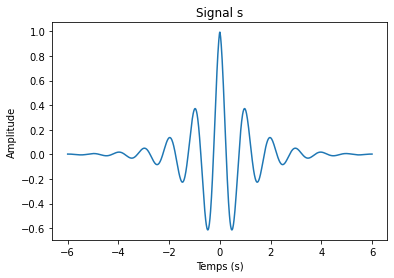

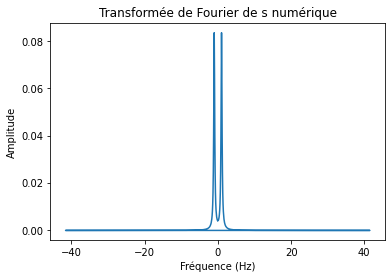

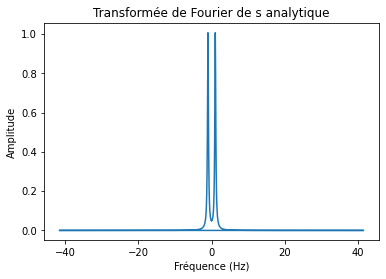

In [119]:
# Définition du signal s
t = np.linspace(-6, 6, 1000)
s = np.exp(-abs(t)) * np.cos(2 * np.pi * t)

# Calcul de la FFT de s
N = len(s)
freqq = np.fft.fftfreq(N, d=t[1]-t[0])
S = np.fft.fft(s)/N

# Transformée de fourier de s calculée analytiquement
fourier_s = 1/(1 + 4*np.pi**2*(freqq-1)**2) + 1/(1 + 4*np.pi**2*(freqq+1)**2)

# Tracé de s et S
plt.figure()
plt.plot(t, s)
plt.title("Signal s")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")

plt.figure()
plt.plot(freqq, np.abs(S))
plt.title("Transformée de Fourier de s numérique")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")

# Tracé de la transformation de Fourier de s
plt.figure()
plt.plot(freqq, fourier_s)
plt.title("Transformée de Fourier de s analytique")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.show()

<p> On reconnait bien deux Dirac d'écalé, l'un positif à $f = \frac{1}{T} = 1$ $Hz$ et l'autre à $-f$, comme dans l'expression analytique aux amplitudes près. </p>

<h2> Approximation de FFT par python </h2>

<h2> Question 1 à 3 </h2>
<p> Cette partie n'a pas été traitée </p>

<h2> Question 4 et 5 </h2>

\begin{verbatim}
t = np.arange(-A, A, Te)
x = s(t)
x_shift = np.fft.fftshift(x)
X = Te * np.fft.fft(x_shift)
f = np.fft.fftfreq(N, d=Te)
plt.plot(f, X)
\end{verbatim}

$\textbf{x_shift = np.fft.fftshift(x)}$ : Cette ligne applique une FFT sur le signal temporel $x(t)$, puis effectue un décalage de la moitié des échantillons pour mettre la fréquence zéro au centre de l'axe des fréquences.

$\textbf{X = Te $\cdot$ np.fft.fft(x_shift)}$ : Cette ligne applique une DFT sur le signal temporel $x(t)$, en multipliant chaque échantillon par l'incrément de temps $Te$.

$\textbf{f = np.fft.fftfreq(N, d=Te)}$ : Cette ligne est utilisé pour calculé l'axe des fréquences correspondant aux échantillons du vecteur $X$.

On peut aussi avoir le même résultat sans utiliser $\textbf{x_shift = np.fft.fftshift(x)}$ avec les lignes de code suivantes :

$\textbf{X = np.fft.fft(x)}$

$\textbf{f = np.fft.fftfreq(len(x), Te)}$

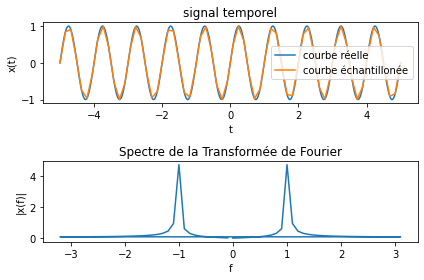

In [121]:
A = 5
N = 64
Te = 2*A/N

# signal 'vraie'
t = np.linspace(-A, A, 1000)
x = np.sin(2*np.pi*t)

# signal echantilloné
t_echantillone = np.linspace(-A, A, N)
x_echantillone = np.sin(2*np.pi*t_echantillone)

# calcul de la transformée de Fourier
x_shift = np.fft.fftshift(x_echantillone)
X = Te * np.fft.fft(x_shift)

# axe des fréquences
f = np.fft.fftfreq(N, d=Te)

# On peut aussi utiliser cette technique
# X = np.fft.fft(x_echantillone)
# f = np.fft.fftfreq(len(x_echantillone), Te)

plt.subplot(2,1,1)
plt.plot(t, x, label = "courbe réelle")
plt.plot(t_echantillone, x_echantillone, label = "courbe échantillonée")
plt.title("signal temporel")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()

plt.subplot(2,1,2)
plt.plot(f, np.abs(X))
plt.title("Spectre de la Transformée de Fourier")
plt.xlabel('f')
plt.ylabel('|x(f)|')
plt.tight_layout()
plt.show()

<p> On retrouve bien deux pics de Dirac décalés aux fréquences $f = 1 Hz$ et $-f$.

<h1> Signal périodique </h1>

<h2> Question 1 </h2>

La fonction $x(t) = 2 \cos(4\pi t) + 3 \cos(8\pi t)$ a une période $T$ qui est déterminée par la plus petite valeur positive pour laquelle la fonction se répète.

La période de la fonction $\cos(at)$ est donnée par $T = \frac{2\pi}{a}$. Ainsi, la période de $\cos(4\pi t)$ est $T_1 = \frac{1}{2}$ et la période de $\cos(8\pi t)$ est $T_2 = \frac{1}{4}$.

La période T du signal x(t) est donc égale à $T_1$.

Ainsi : $$T=\frac{1}{2}$$

<h2> Question 2 </h2>

D'après la formule de Taylor :

$$\cos(\theta) = \frac{e^{j\theta} + e^{-j\theta}}{2}$$

En appliquant cette formule à la première composante de $x(t)$, on a :

\begin{align*}
2\cos(4\pi t) &= 2\cdot\frac{e^{j(4\pi t)} + e^{-j(4\pi t)}}{2} \
&= e^{j(4\pi t)} + e^{-j(4\pi t)}
\end{align*}

De même, en appliquant la formule d'Euler à la seconde composante de $x(t)$, on a :

\begin{align*}
3\cos(8\pi t) &= 3\cdot\frac{e^{j(8\pi t)} + e^{-j(8\pi t)}}{2} \
&= \frac{3}{2}e^{j(8\pi t)} + \frac{3}{2}e^{-j(8\pi t)}
\end{align*}

En combinant ces deux expressions, on peut écrire le signal $x(t)$ sous forme exponentielle :

$$x(t) = e^{j(4\pi t)} + e^{-j(4\pi t)} + \frac{3}{2}e^{j(8\pi t)} + \frac{3}{2}e^{-j(8\pi t)}$$

Ainsi, la transofrmée de Fourier de $x(t)$ s'obtient de la manière suivante :

$\hat{x}(f) = \int_{-\infty}^{\infty} x(t) e^{-2i\pi ft} dt$

en utilisant $x(t) = e^{j(4\pi t)} + e^{-j(4\pi t)} + \frac{3}{2}e^{j(8\pi t)} + \frac{3}{2}e^{-j(8\pi t)}$

$\hat{x}(f) = \frac{2}{T}\int_{0}^{T} x(t) e^{-2i\pi ft} dt$ 

avec T la période, T = $\frac{1}{2}$

Ainsi, on obtient :

$$\hat{x}(f) = 3\pi \cdot \delta(f-8\pi) + 2\pi \cdot \delta(f - 4\pi) + 2\pi \cdot \delta(f + 4\pi) + 3\pi \cdot \delta(f + 8\pi)$$

avec $\delta$ la distribution de Dirac.

<h2> Question 3 à 5 </h2>

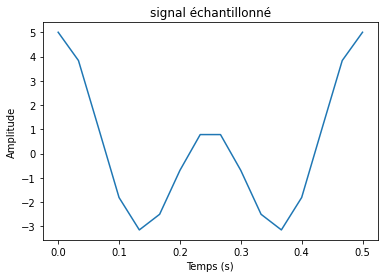

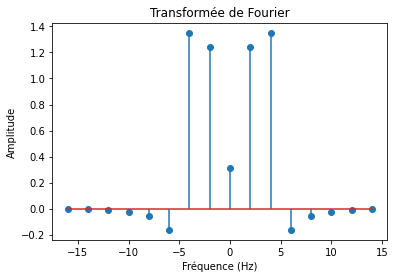

In [92]:
T = 0.5
Nt = 16
Te = T/Nt

# axe temporel
t = np.linspace(0, T, Nt)

# calcul de la fft
x = 2*np.cos(4*np.pi*t) + 3*np.cos(8*np.pi*t)
X = np.fft.fft(x)/Nt

# axe des fréquences
freqss = np.fft.fftfreq(len(x), Te)

# affichage
plt.figure()
plt.plot(t, x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title("signal échantillonné")
plt.figure()
plt.stem(freqss, np.real(X))
# La partie imaginaire est nulle car la fonction est paire
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title("Transformée de Fourier")
plt.show()

<p> On remarque une légère imprécision et une présence de "bruit" avec cette méthode </p>

<h2> Question 6 et 7 </h2>

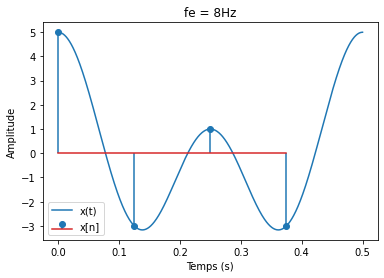

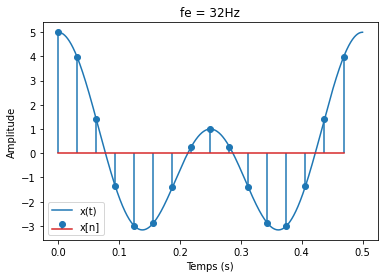

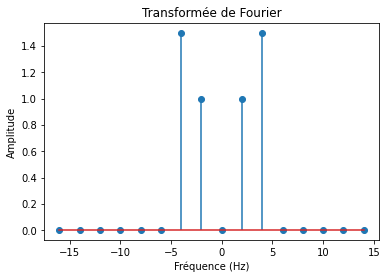

In [17]:
# Définition du signal x(t)
T = 0.5
t = np.linspace(0, T, 1000)
x = 2*np.cos(4*np.pi*t) + 3*np.cos(8*np.pi*t)

# Échantillonnage à la fréquence fe = 8 Hz et 32 Hz
fe = 32
n = np.arange(0, int(T*fe))
tn = n/fe
xn = 2*np.cos(4*np.pi*tn) + 3*np.cos(8*np.pi*tn)
xk = np.fft.fft(xn)/len(n)

fe2 = 8
n2 = np.arange(0, int(T*fe2))
tn2 = n2/fe2
xn2 = 2*np.cos(4*np.pi*tn2) + 3*np.cos(8*np.pi*tn2)

# Axe des fréquences
freqs = np.fft.fftfreq(len(xn), 1/fe)

# Tracé des signaux
plt.figure()
plt.title('fe = 8Hz')
plt.plot(t, x, label='x(t)')
plt.stem(tn2, xn2, label='x[n]')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.figure()
plt.title('fe = 32Hz')
plt.plot(t, x, label='x(t)')
plt.stem(tn, xn, label='x[n]')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.figure()
plt.stem(freqs, np.real(xk))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title("Transformée de Fourier")
plt.show()

<p> On reconnait bien 4 Dirac de la même forme que dans l'expression analytique. </p>
<p> De plus, les deux spectres renvoyés par les deux méthodes sont de la même forme avec des pics de Dirac décalés aux mêmes fréquences </p>
<p> Il peut exister des différences de magnitude si la choix de l'entier par lequel on divise la fft n'est pas choisi judicieusement </p> 

<h1> Décalage fréquentiel </h1>

Soit $x(t) = \frac{1}{1+t^2}$ le signal continu. Pour illustrer la propriété de décalage fréquentiel de la TF, nous calculons la transformée de Fourier de $x(t) \cdot e^{i2\pi f_0 t}$ avec $f_0 = 20 Hz$.

La transformée de Fourier de $x(t)$ est donnée par :

$$X(f) = \int_{-\infty}^{+\infty} x(t) e^{-i2\pi ft} dt = \int_{-\infty}^{+\infty} \frac{1}{1+t^2} e^{-i2\pi ft} dt$$

En utilisant la méthode des résidus, on peut montrer que :

$$X(f) = \pi e^{-|f|}$$

En utilisant la propriété de décalage fréquentiel de la TF, la transformée de Fourier de $x(t) \cdot e^{i2\pi f_0 t}$ est donnée par :

$$X(f) = X(f-f_0) = \pi e^{-|f-f_0|}$$

Le module de $X(f)$ est alors pour $f_0 = 20$ Hz :

$$\begin{align*}
|X(f)| &= \pi e^{-|f-f_0|} \\
|X(f)| &= \pi e^{-|f-20|} \\
\end{align*}$$
Le tracé montre un pic à la fréquence $f_0 = 20$ Hz, qui correspond au décalage fréquentiel introduit par le facteur d'expansion $e^{i2\pi f_0 t}$ dans le signal.

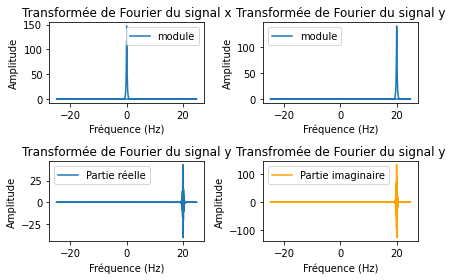

In [115]:
def x(t):
    return 1/(1+t**2)

f0 = 20

def y(t):
    return x(t)*np.exp(2j*np.pi*f0*t)

f=50
t = np.linspace(-10, 10, 1000)
X = np.fft.fft(x(t))
Y = np.fft.fft(y(t))
freqqss = np.fft.fftfreq(len(t), 1/f)

fig, axs = plt.subplots(2,2)
axs[0,0].set_title("Transformée de Fourier du signal x")
axs[0,0].set_xlabel("Fréquence (Hz)")
axs[0,0].set_ylabel("Amplitude")
axs[0,0].plot(freqqss, np.abs(X), label = "module")
axs[0,0].legend()

axs[0,1].set_title("Transformée de Fourier du signal y")
axs[0,1].set_xlabel("Fréquence (Hz)")
axs[0,1].set_ylabel("Amplitude")
axs[0,1].plot(freqqss, np.abs(Y), label = "module")
axs[0,1].legend()

axs[1,0].set_title("Transformée de Fourier du signal y")
axs[1,0].set_xlabel("Fréquence (Hz)")
axs[1,0].set_ylabel("Amplitude")
axs[1,0].plot(freqqss, np.real(Y), label = "Partie réelle")
axs[1,0].legend()

axs[1,1].set_title("Transfromée de Fourier du signal y")
axs[1,1].set_xlabel("Fréquence (Hz)")
axs[1,1].set_ylabel("Amplitude")
axs[1,1].plot(freqqss, np.imag(Y), label = "Partie imaginaire", color="orange")
axs[1,1].legend()
plt.tight_layout()
plt.show()